In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def simbootstrap(data):
    k = int(np.ceil(float(data.shape[0])/1))
    r_ind = np.floor(np.random.rand(1,k)*data.shape[0])
    bootstrapsample=data[r_ind.astype('int')]
    return bootstrapsample

Average bootstrapmean is  -0.00214032539723
Average samplemean is  -0.00287895569226
Bootstrapmean Variance is  0.0103286981064
Samplemean Variance is  0.0102734496541


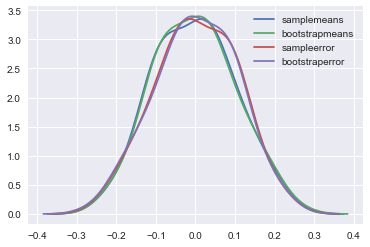

In [4]:
resamples=100 #how many times we sample the population
n=100 # how many data points we have in our sample
bootstraps=100 #how many bootstraps samples are collected on this sample
    
#adding 'noisy' data
intercept=5
variance=10
error_rarity=n/2

#initializing
bootstrapdata=[];
samplemeans=[];
finalbootstrapmeans=[];

    
for num in range(resamples):
    bootstrapdata=[]
    data=np.random.randn(n) #create data
#   m=n/error_rarity #length of 'noisy' data
#   morevariancedata= variance * np.random.randn(int(m)) + intercept #create noisy data
#   alldata=data.tolist() + morevariancedata.tolist() #add noisy data
#   data=np.asarray(alldata)
    samplemeans.append(data.mean()) #create sample mean and append to sample mean list

    for nums in range(bootstraps):
        tempsample= simbootstrap(data).mean() #bootstrap sample
        bootstrapdata.append(tempsample) #append bootstrap to list

    bootstrapdata=np.asarray(bootstrapdata).ravel()
    finalbootstrapmeans.append(bootstrapdata.mean()) #take mean of all bootstraps for this sample



finalbootstrapmeans=np.asarray(finalbootstrapmeans).ravel()
samplemeans=np.asarray(samplemeans)
error=samplemeans-finalbootstrapmeans
sampleerror=0-samplemeans
bootstraperror=0-finalbootstrapmeans
#import pdb; pdb.set_trace()

#import matplotlib.pyplot as plt
#plt.hist(finalbootstrapmeans) 
#plt.hist(samplemeans) 


#print(correlation)
print('Average bootstrapmean is ', sum(finalbootstrapmeans)/len(finalbootstrapmeans))
print('Average samplemean is ', sum(samplemeans)/len(samplemeans))
#
print('Bootstrapmean Variance is ', finalbootstrapmeans.var())
print('Samplemean Variance is ', samplemeans.var())



sns.kdeplot(samplemeans, label="samplemeans")
sns.kdeplot(finalbootstrapmeans, label="bootstrapmeans")
sns.kdeplot(sampleerror, label="sampleerror")
sns.kdeplot(bootstraperror, label="bootstraperror")
#ns.kdeplot(samplemeans, bw=.2, label="bw: 0.2")
#sns.kdeplot(samplemeans, bw=2, label="bw: 2")
plt.legend();

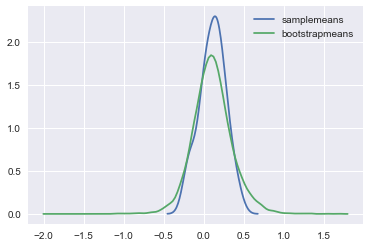

In [10]:
sns.kdeplot(samplemeans, label="samplemeans")
sns.kdeplot(finalbootstrapmeans, label="bootstrapmeans")
#ns.kdeplot(samplemeans, bw=.2, label="bw: 0.2")
#sns.kdeplot(samplemeans, bw=2, label="bw: 2")
plt.legend();